# Practical Statistics for Data Science with SciPy - Part 1

This tutorial is your hands-on guide to performing high-quality statistical analysis in Python. We'll use the powerful `pandas` library for data manipulation and `scipy` for its rich set of statistical functions. We'll also use `matplotlib` and `seaborn` for visualization, which is crucial for interpreting our results.

**Our Goal:** To move beyond theory and learn how to ask questions, test assumptions, and find meaningful, real-world insights from data.

---

### Our Datasets for Today's Journey

We will be using three distinct datasets to explore different statistical challenges:

1.  **Telco Customer Churn (Primary Narrative):** We'll analyze why customers leave a telecom company. This is a classic business problem full of categorical and numerical data.
2.  **Medical Insurance Costs:** We'll explore the factors that drive up healthcare costs. This dataset is perfect for regression and correlation analysis.
3.  **Used Car Prices:** A large, messy dataset that will show us why we sometimes need to use more robust statistical methods when our data isn't perfect.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
# Set some display options for better readability
pd.set_option('display.max_columns', 50)
sns.set_style('whitegrid')

# Module 1: Foundations - Basic Stats

In [5]:
# Sample dataset
data = [2, 3, 3, 5, 7, 10, 10, 10, 12, 15, 18, 20]

## Measures of Central Tendency

Measures of central tendency represent the center or typical value of a dataset.

### Mean
The **mean** is the sum of all values divided by the number of values. It is sensitive to outliers.
$$ \text{Mean} = \frac{\sum_{i=1}^{n} x_i}{n} $$

In [6]:
mean_value = np.mean(data)
print(f"Mean: {mean_value}")

Mean: 9.583333333333334


### Median
The **median** is the middle value of a dataset that has been sorted in ascending order. It is less affected by outliers than the mean.

In [7]:
median_value = np.median(data)
print(f"Median: {median_value}")

Median: 10.0


### Mode
The **mode** is the value that appears most frequently in a dataset. A dataset can have one mode, more than one mode, or no mode.

In [8]:
mode_value = stats.mode(data)
print(f"Mode: {mode_value.mode}")

Mode: 10


## Measures of Variability

Measures of variability (or dispersion) describe the spread of the data points in a dataset.

### Variance
**Variance** measures the average squared difference of the values from the mean. A higher variance indicates that the data points are very spread out.
$$ \text{Variance} (\sigma^2) = \frac{\sum_{i=1}^{n} (x_i - \mu)^2}{n} $$

In [13]:
variance_value = np.var(data)
print(f"Variance: {variance_value:.2f}")

Variance: 32.24


### Standard Deviation
The **standard deviation** is the square root of the variance. It is expressed in the same units as the data, making it easier to interpret.
$$ \text{Standard Deviation} (\sigma) = \sqrt{\frac{\sum_{i=1}^{n} (x_i - \mu)^2}{n}} $$

In [16]:
std_dev_value = np.std(data)
print(f"Standard Deviation: {std_dev_value:.2f}")

Standard Deviation: 5.68


## What is a Distribution?

Imagine you are measuring the height of every dog in a large park. You wouldn't expect every dog to be the exact same height. You'd find a variety of heights: some small dogs, many medium-sized dogs, and some large dogs.

A **distribution** is a way of showing all the possible values in your data (the different heights) and how often each value occurs (how many dogs of each height). It gives you a complete picture of the data's personality. The most common way to see a distribution is by drawing a **histogram**.

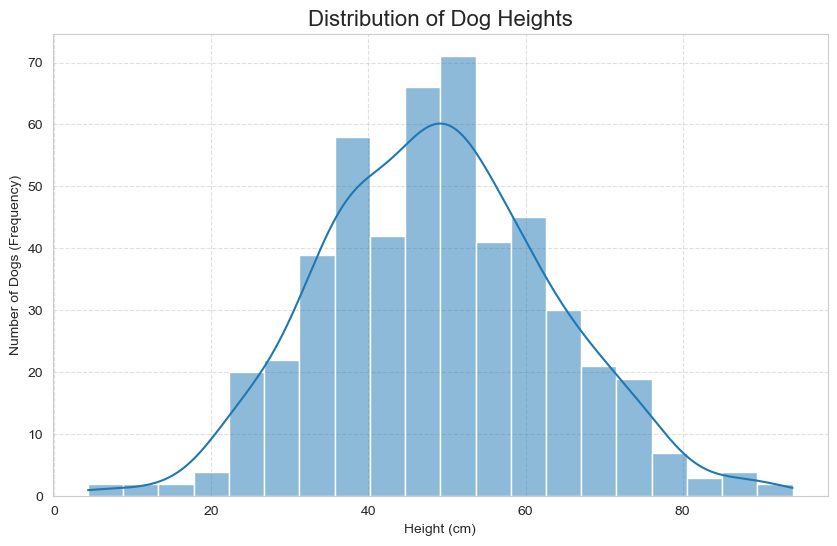

In [3]:
# Let's simulate the heights (in cm) of 500 dogs
dog_heights = np.random.normal(loc=50, scale=15, size=500)

plt.figure(figsize=(10, 6))
sns.histplot(dog_heights, kde=True, bins=20)
plt.title('Distribution of Dog Heights', fontsize=16)
plt.xlabel('Height (cm)')
plt.ylabel('Number of Dogs (Frequency)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Look at the histogram above. The bars show how many dogs fall into each height range. The smooth line **(called a Kernel Density Estimate or KDE)** gives us a cleaner idea of the overall shape. This specific shape, which is very common, is what we're here to learn about!

A density curve is essentially a smoothed-out version of a histogram. Think of the histogram as a blocky, pixelated image of your data's shape; the density curve is the smooth, high-resolution version.
**The key change is the y-axis**. Instead of showing counts (how many), the density curve shows probability density. This is done so the total area under the curve is exactly 1, representing 100% of your data, which allows us to think about the area in a certain range as a probability.

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(dog_heights)
plt.title('Distribution of Dog Heights', fontsize=16)
plt.xlabel('Height (cm)')
plt.ylabel('Density')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## The Normal Distribution: The "Bell Curve"

The shape we saw with the dog heights is called a **Normal Distribution**, also known as a **Gaussian Distribution** or, most famously, the **"Bell Curve"**. It's arguably the most important distribution in all of statistics because it shows up *everywhere* in the real world:
- People's heights, weights, and blood pressure
- Scores on a test
- Measurement errors in an experiment

The core idea is simple: **most values cluster around a central average, and values that are further away from the average become less and less common.** In our example, most dogs have a height near the average (50 cm), and there are very few tiny dogs or giant dogs.

### Key Characteristics of a Normal Distribution

1.  **Symmetrical**: The left side is a perfect mirror image of the right side.
2.  **Unimodal**: It has only one peak, or highest point.
3.  **Mean, Median, and Mode are Equal**: The center of the curve is the peak, and this single point represents the mean, the median, and the mode of the data.

A normal distribution is defined by just two numbers, or **parameters**:
- **The Mean ($ \mu $)**: This tells us where the center of the bell is. It's the peak of the curve.
- **The Standard Deviation ($ \sigma $)**: This tells us how spread out the bell is. A small standard deviation results in a tall, narrow curve, while a large standard deviation results in a short, wide curve.

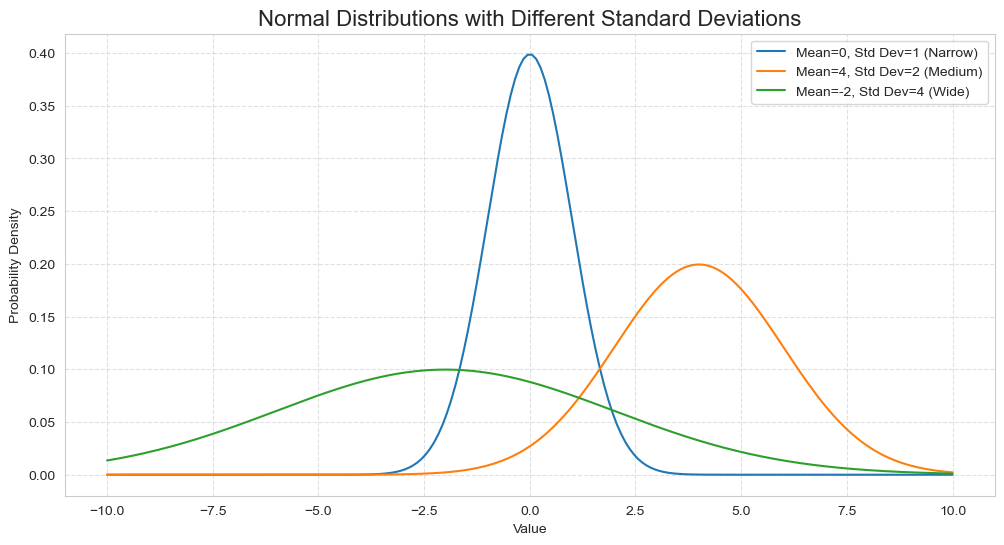

In [14]:
from scipy.stats import norm

x = np.linspace(-10, 10, 200)

# Same mean, different standard deviations
plt.figure(figsize=(12, 6))
plt.plot(x, norm.pdf(x, loc=0, scale=1), label='Mean=0, Std Dev=1 (Narrow)')
plt.plot(x, norm.pdf(x, loc=4, scale=2), label='Mean=4, Std Dev=2 (Medium)')
plt.plot(x, norm.pdf(x, loc=-2, scale=4), label='Mean=-2, Std Dev=4 (Wide)')
plt.title('Normal Distributions with Different Standard Deviations', fontsize=16)
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
x = np.linspace(120, 220, 200) # Human Height Distribution


plt.figure(figsize=(12, 6))
plt.plot(x, norm.pdf(x, loc=170, scale=10))
plt.title('Normal Distributions with Different Standard Deviations', fontsize=16)
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
## create your own normal distribution of any interesting feature you'd like

In [ ]:
# Another way to generate normal distribution using numpy

data = np.random.normal(loc=170, scale=10, size=1000)

# Plot histogram
sns.histplot(data, kde=True)
plt.title(f'Normal Distribution (mean={data.mean()}, std={data.std()})')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

### The Empirical Rule (The 68-95-99.7 Rule)

The Empirical Rule is a fantastic rule of thumb for understanding normally distributed data. It tells us what percentage of our data we can expect to find within a certain number of standard deviations from the mean.

For any normal distribution:
- **~68%** of the data falls within **1** standard deviation of the mean ($ \mu \pm 1\sigma $).
- **~95%** of the data falls within **2** standard deviations of the mean ($ \mu \pm 2\sigma $).
- **~99.7%** of the data falls within **3** standard deviations of the mean ($ \mu \pm 3\sigma $).

So, if we go back to our dog height example (mean=50, std dev=15):
- We can be confident that about 68% of the dogs are between 35 cm ($50-15$) and 65 cm ($50+15$).
- We can be very confident that about 95% of the dogs are between 20 cm ($50-30$) and 80 cm ($50+30$).
- Almost all the dogs (99.7%) will be between 5 cm and 95 cm.

In [ ]:
# Visualization of the Empirical Rule
mu, sigma = 0, 1 # A standard normal distribution
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 500)
y = norm.pdf(x, mu, sigma)

plt.figure(figsize=(12, 6))
plt.plot(x, y, color='black')

# Shade areas
plt.fill_between(x, y, where=((x > mu - sigma) & (x < mu + sigma)), color='skyblue', alpha=0.5, label='68%')
plt.fill_between(x, y, where=((x > mu - 2*sigma) & (x < mu + 2*sigma)), color='dodgerblue', alpha=0.3, label='95%')
plt.fill_between(x, y, where=((x > mu - 3*sigma) & (x < mu + 3*sigma)), color='royalblue', alpha=0.2, label='99.7%')

plt.title('The Empirical Rule (68-95-99.7)', fontsize=16)
plt.xticks([mu-3*sigma, mu-2*sigma, mu-sigma, mu, mu+sigma, mu+2*sigma, mu+3*sigma],
           ['μ-3σ', 'μ-2σ', 'μ-1σ', 'μ', 'μ+1σ', 'μ+2σ', 'μ+3σ'])
plt.ylabel('Probability Density')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

##  Skewness and Kurtosis - Definition and Intuition


**Skewness** measures the **asymmetry** or lean of a data distribution. While a perfect normal distribution is perfectly symmetrical (skewness = 0), many real-world datasets are not. A classic example of this is the **Log-Normal Distribution**.


A variable is log-normally distributed if the **logarithm** of its values is normally distributed. This creates a distribution with a **positive (or right) skew**. The data is bunched up at the low end and has a long tail stretching out to the right.

This shape is incredibly common in the real world:
- Personal income
- Stock prices
- The number of comments on a social media post

In these cases, most values are modest (most people have an average income), but a few are exceptionally high (a few billionaires), pulling the **mean** far to the right of the **median**.

In [4]:
from scipy.stats import skew, kurtosis

Skewness for right-skewed distribution: 3.9432142625932296
Skewness for left-skewed distribution: -3.151639401694288
Skewness for normal distribution: 0.009910587802344321


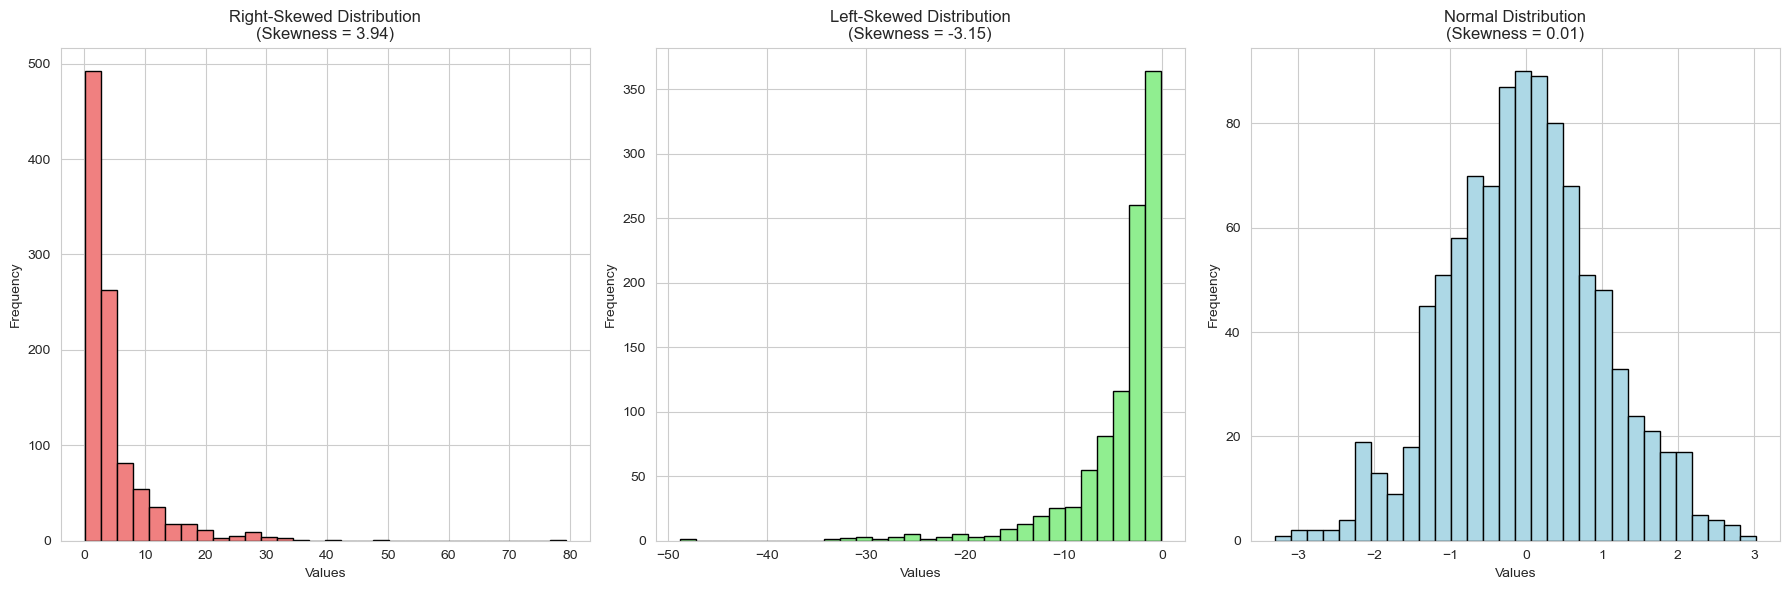

In [6]:
# 1. Right-skewed distribution (positive skew, long tail on the right)
data_right_skewed = np.random.lognormal(mean=1, sigma=1, size=1000)

# 2. Left-skewed distribution (negative skew, long tail on the left)
data_left_skewed = -np.random.lognormal(mean=1, sigma=1, size=1000)
    
# 3. Normal distribution (no skew)
data_normal = np.random.normal(loc=0, scale=1, size=1000)

# # Calculate skewness for each distribution
# skew_right = pd.Series(data_right_skewed).skew()
# skew_left = pd.Series(data_left_skewed).skew()
# skew_normal = pd.Series(data_normal).skew()

skew_right = skew(data_right_skewed)
skew_left = skew(data_left_skewed)
skew_normal = skew(data_normal)

# Print skewness values
print("Skewness for right-skewed distribution:", skew_right)
print("Skewness for left-skewed distribution:", skew_left)
print("Skewness for normal distribution:", skew_normal)

# Plot all three distributions in one figure
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Right-skewed plot
axes[0].hist(data_right_skewed, bins=30, edgecolor='black', color='lightcoral')
axes[0].set_title(f'Right-Skewed Distribution\n(Skewness = {skew_right:.2f})')
axes[0].set_xlabel('Values')
axes[0].set_ylabel('Frequency')

# Left-skewed plot
axes[1].hist(data_left_skewed, bins=30, edgecolor='black', color='lightgreen')
axes[1].set_title(f'Left-Skewed Distribution\n(Skewness = {skew_left:.2f})')
axes[1].set_xlabel('Values')
axes[1].set_ylabel('Frequency')

# Normal distribution plot
axes[2].hist(data_normal, bins=30, edgecolor='black', color='lightblue')
axes[2].set_title(f'Normal Distribution\n(Skewness = {skew_normal:.2f})')
axes[2].set_xlabel('Values')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


### The Power of Transformation
The beauty of a log-normal distribution is that we can easily 'fix' the skew. By taking the natural logarithm (`np.log()`) of the data, we can transform it back to the symmetrical normal distribution it came from. This is a very common and powerful technique in data analysis

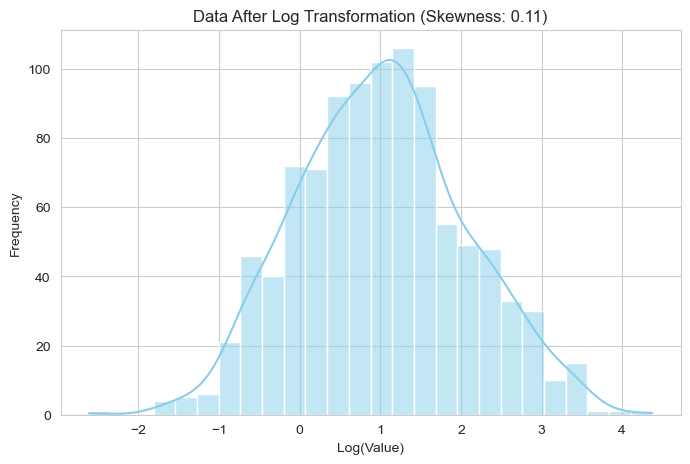

In [7]:
# Transform the data with a log function
transformed_data = np.log(data_right_skewed)

# Visualize the now-symmetrical data
plt.figure(figsize=(8, 5))
sns.histplot(transformed_data, kde=True, color='skyblue')
plt.title(f'Data After Log Transformation (Skewness: {stats.skew(transformed_data):.2f})')
plt.xlabel('Log(Value)')
plt.ylabel('Frequency')
plt.show()

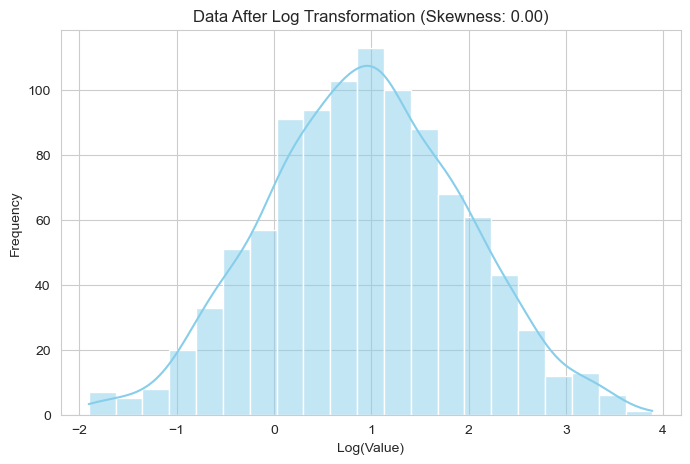

In [ ]:
### How to do the same transformation to the left??? ###

# Transform the data with a log function
# Must have a "-" sign before data_left_skewed 
transformed_data = np.log(-data_left_skewed)

# Visualize the now-symmetrical data
plt.figure(figsize=(8, 5))
sns.histplot(transformed_data, kde=True, color='skyblue')
plt.title(f'Data After Log Transformation (Skewness: {stats.skew(transformed_data):.2f})')
plt.xlabel('Log(Value)')
plt.ylabel('Frequency')
plt.show()

## Kurtosis: How Heavy Are the Tails?

**Kurtosis** measures the "tailedness" of a distribution. It tells you how much of the data is in the tails compared to a normal distribution. This is a great way to spot the presence of **outliers**.

We measure kurtosis relative to the normal distribution (which has a kurtosis of 0).

#### Positive Kurtosis
A distribution with **heavy tails** and a sharper peak. This means it produces more outliers than a normal distribution.
* **Kurtosis > 0**

#### Negative Kurtosis
A distribution with **light tails** and a flatter peak. This means it produces fewer outliers than a normal distribution.
* **Kurtosis < 0**

#### very low or zero Kurtosis
This is a normal distribution, which serves as our baseline.
* **Kurtosis = 0**

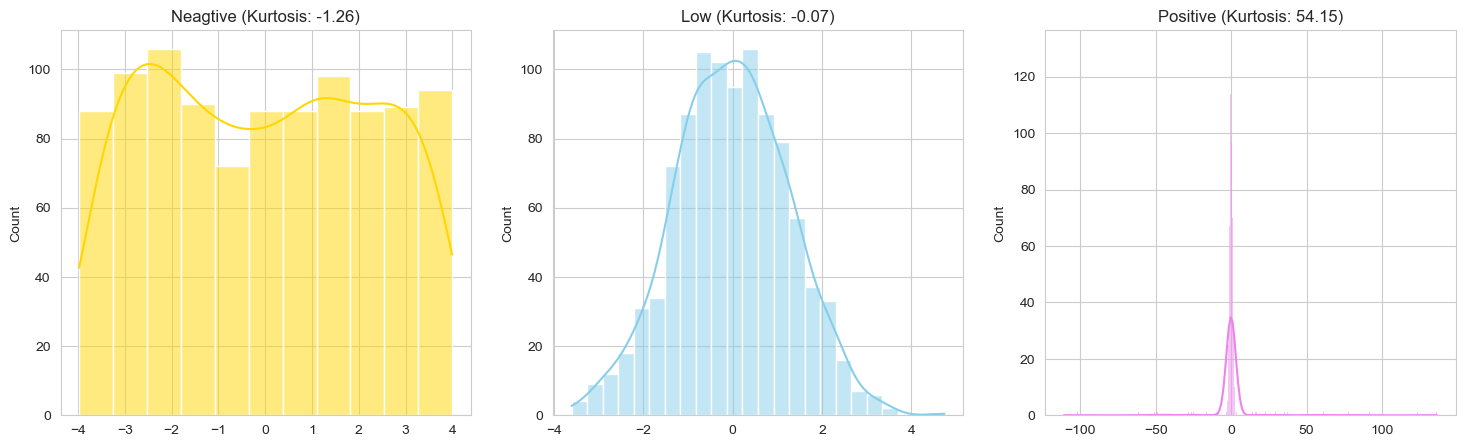

In [8]:
# Generate data with different kurtosis
very_centered_data = np.concatenate([np.random.normal(0, 1, 1000), np.random.normal(0, 50, 50)])
normal_data = np.random.normal(0, 1.3, 1000)
uniform_data = np.random.uniform(-4, 4, 1000)

# Plotting
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(uniform_data, kde=True, ax=ax1, color='gold')
ax1.set_title(f'Neagtive (Kurtosis: {kurtosis(uniform_data):.2f})')
sns.histplot(normal_data, kde=True, ax=ax2, color='skyblue')
ax2.set_title(f'Low (Kurtosis: {kurtosis(normal_data):.2f})')
sns.histplot(very_centered_data, kde=True, ax=ax3, color='violet')
ax3.set_title(f'Positive (Kurtosis: {kurtosis(very_centered_data):.2f})')
plt.show()